In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATASET_DIR = "../dataset/classification/cmc"
SAVE_NAME = "cmc.csv"

In [4]:
df = pd.read_csv(f"{DATASET_DIR}/{SAVE_NAME}")
df

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [5]:
df.corr().iloc[-1,:].sort_values()

Wife's age                     -0.162953
Media exposure                 -0.119206
Wife's religion                -0.025271
Husband's occupation            0.018161
Wife's now working?             0.054438
Number of children ever born    0.082772
Standard-of-living index        0.091149
Husband's education             0.103226
Wife's education                0.149777
Contraceptive method used       1.000000
Name: Contraceptive method used, dtype: float64

In [6]:
df.groupby("Contraceptive method used").median()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure
Contraceptive method used,,,,,,,,,
1,32,3,4,2,1,1,2,3,0
2,35,4,4,3,1,1,2,4,0
3,29,3,4,3,1,1,2,3,0


In [7]:
df.groupby("Contraceptive method used").mean()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure
Contraceptive method used,,,,,,,,,
1,33.424483,2.670906,3.281399,2.934817,0.880763,0.729730,2.200318,2.953895,0.117647
2,34.384384,3.456456,3.663664,3.738739,0.771772,0.732733,1.840841,3.468468,0.030030
3,30.244618,2.988258,3.459883,3.352250,0.864971,0.784736,2.254403,3.136986,0.048924


In [8]:
df.groupby("Wife's education").count()["Contraceptive method used"]

Wife's education
1    152
2    334
3    410
4    577
Name: Contraceptive method used, dtype: int64

In [9]:
df.groupby("Media exposure").count()["Contraceptive method used"]

Media exposure
0    1364
1     109
Name: Contraceptive method used, dtype: int64

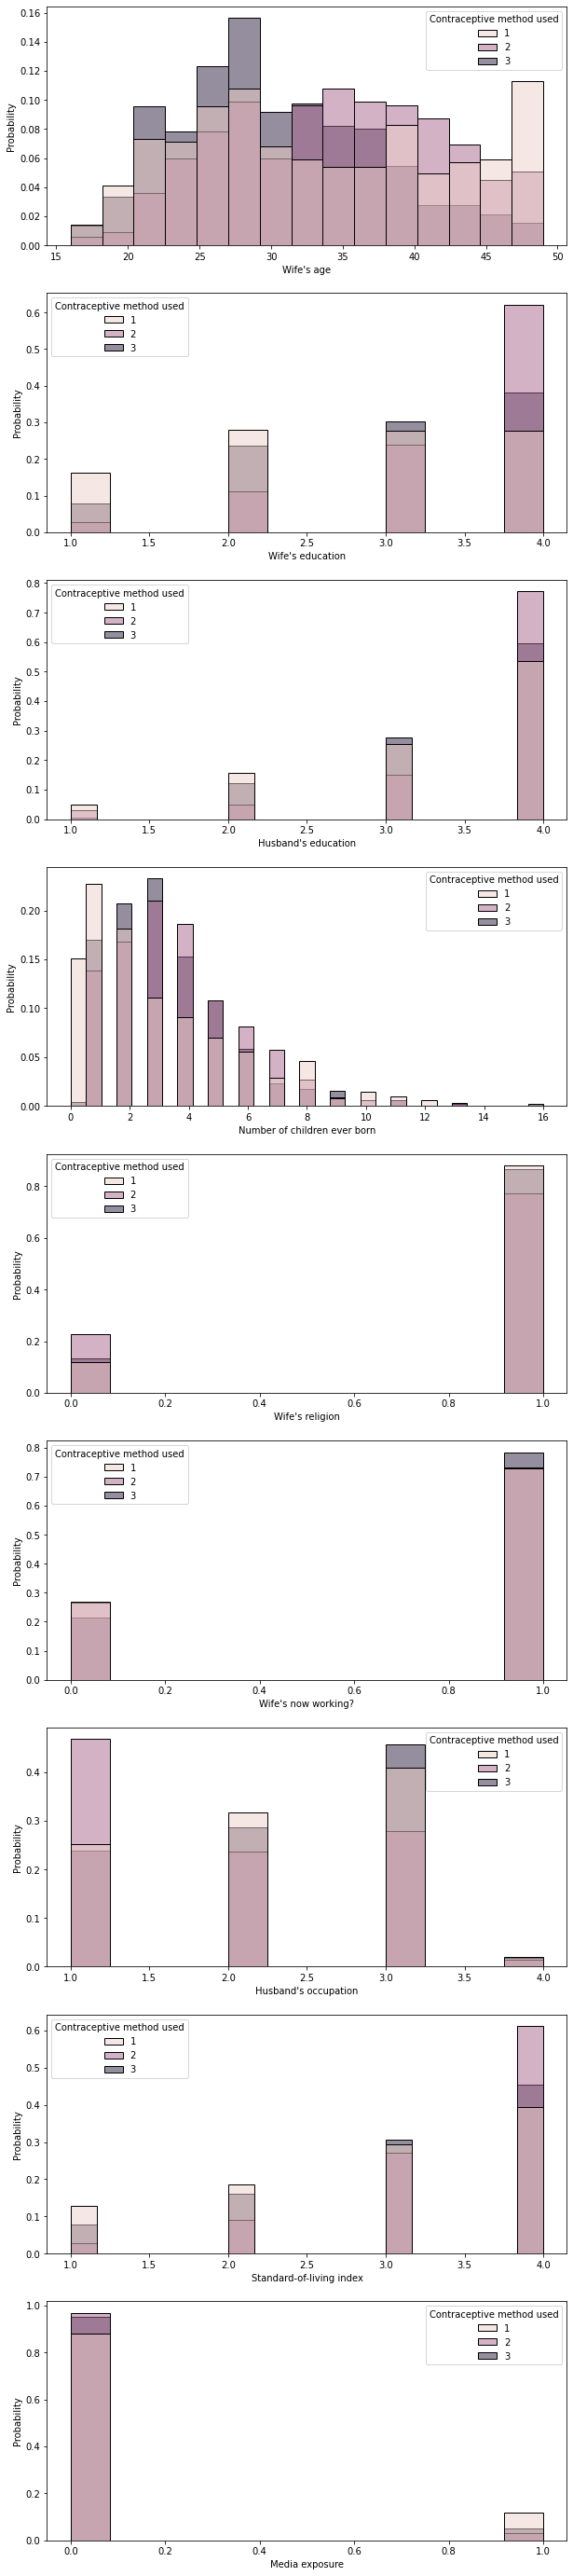

In [10]:
fig, ax = plt.subplots(len(df.columns[:-1]),1, figsize=(10,50))
for i, col in enumerate(df.columns[:-1]):
    g = sns.histplot(x=col, hue="Contraceptive method used", stat="probability", 
                     common_norm=False, data=df, ax=ax[i], alpha=0.5)

# t-SNE

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [29]:
def plot_tsne(col):

    features_ori = df.drop(columns=[col,"Contraceptive method used"]).sample(1000)
    scaler = StandardScaler()
    features =scaler.fit_transform(features_ori)

    tsne = TSNE(perplexity=10, random_state=0)
    features_embedd = tsne.fit_transform(features)

    df_embedd = pd.DataFrame(features_embedd, columns=["embedd_x","embedd_y"])
    df_embedd[col] = df[col]
    df_embedd["Contraceptive method used"] = df["Contraceptive method used"]

    sns.relplot(x="embedd_x", y="embedd_y", col=col, hue="Contraceptive method used", data=df_embedd)

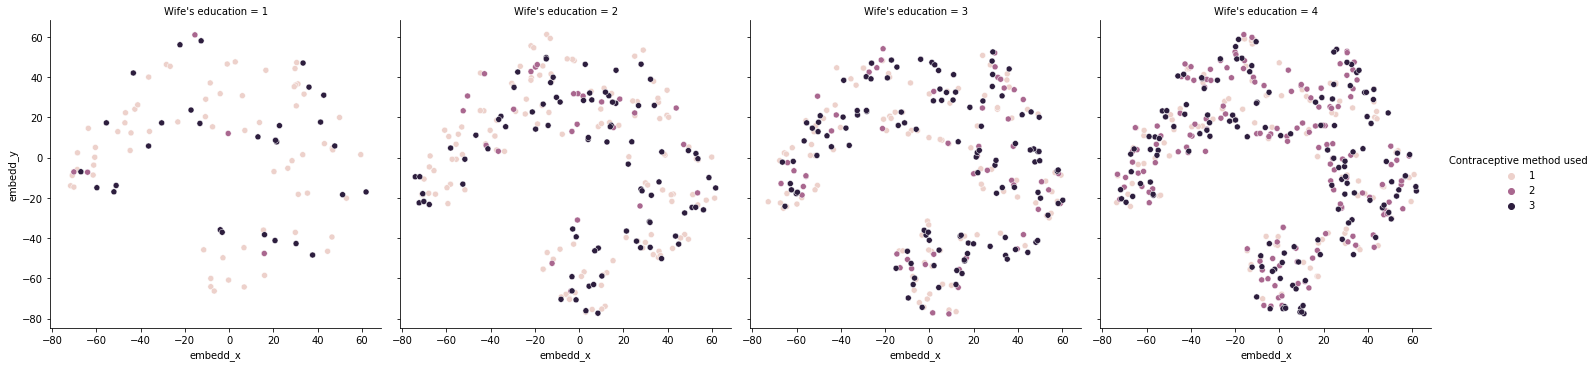

In [15]:
plot_tsne("Wife's education")

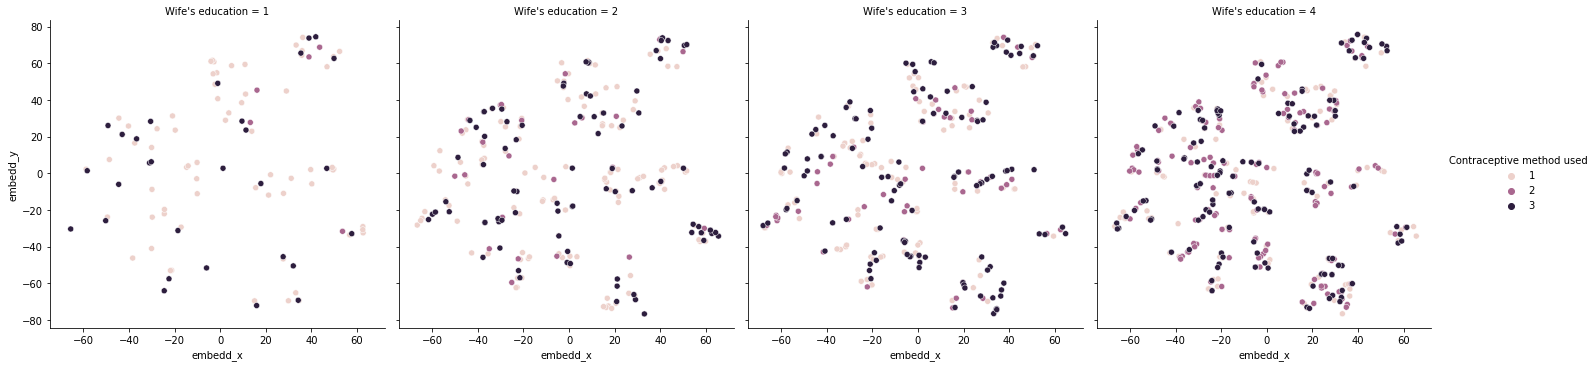

In [30]:
plot_tsne("Wife's education")

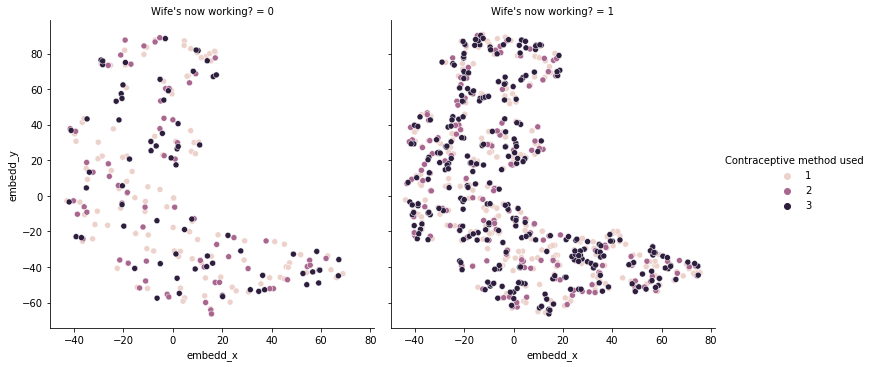

In [16]:
plot_tsne("Wife's now working?")

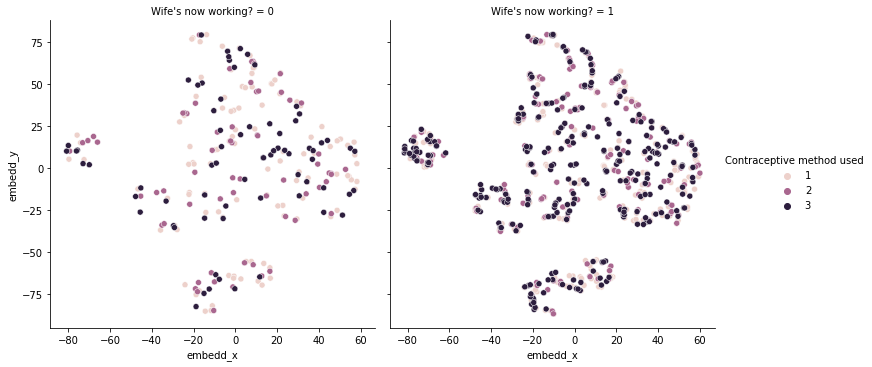

In [24]:
plot_tsne("Wife's now working?")

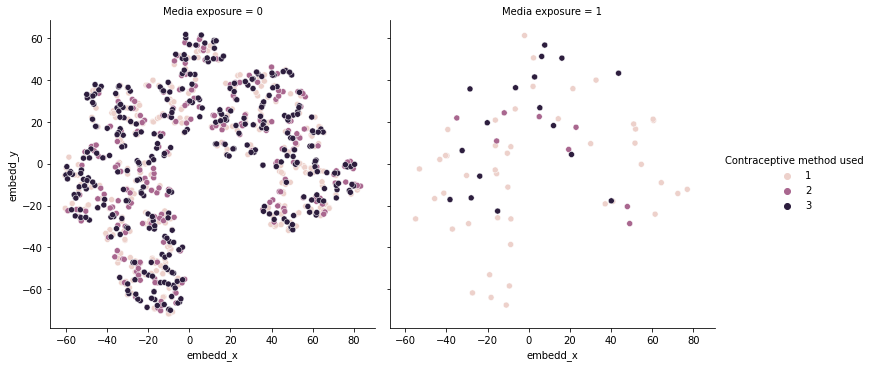

In [17]:
plot_tsne("Media exposure")

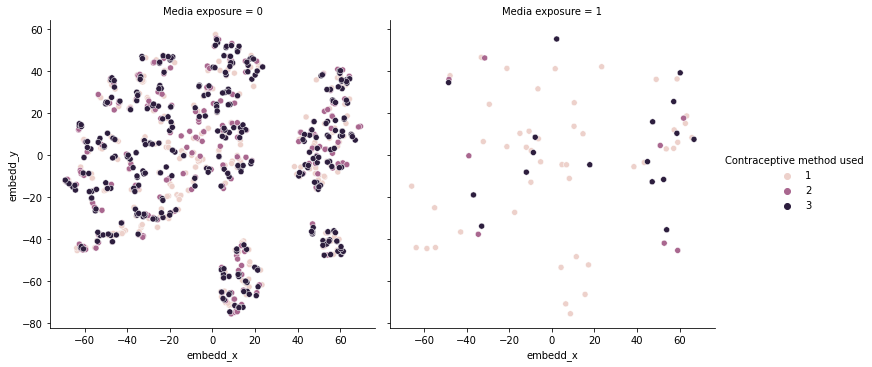

In [25]:
plot_tsne("Media exposure")